In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install anvil-uplink

     |████████████████████████████████| 61kB 4.1MB/s eta 0:00:011
  Created wheel for ws4py: filename=ws4py-0.3.4-cp36-none-any.whl size=41809 sha256=cc791f7e9225343edf7aa6b66e39b6b70760b5bfd1d06348330c00316444cee3
  Stored in directory: /root/.cache/pip/wheels/19/1f/0d/beff5822af761b66067b5e0b251a9c66af3ae15828ee9a8f15
Successfully built ws4py
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install plotly==3.10.0

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rand
import tensorflow as tf

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Plotting
from IPython.display import Image, display # Display images
import cv2 # Opencv for computer vision tasks

from keras.models import Sequential, Model, load_model  # for building sequential model
from keras.layers import Conv2D, Dense, Dropout, Activation, MaxPooling2D, Flatten, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

from keras.applications import InceptionV3, ResNet50, VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.inception_v3 import preprocess_input, decode_predictions

from keras.preprocessing.image import ImageDataGenerator ,img_to_array ,load_img

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from tqdm import tqdm # Visualize loop progress

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import cv2                  
import numpy as np                  
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
# Any results you write to the current directory are saved as output.

In [9]:
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import RMSprop


In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rand
import tensorflow as tf

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Plotting

import cv2 # Opencv for computer vision tasks

from keras.models import Sequential, Model, load_model  # for building sequential model
from keras.layers import Conv2D, Dense, Dropout, Activation, MaxPooling2D, Flatten, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

from keras.applications import InceptionV3, ResNet50, VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.inception_v3 import preprocess_input, decode_predictions

from keras.preprocessing.image import ImageDataGenerator


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from tqdm import tqdm # Visualize loop progress


# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import cv2                  
import numpy as np                  
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [11]:
import os
print(os.listdir('../input/flowers/flowers'))

['daisy', 'rose', 'dandelion', 'sunflower', 'tulip']


In [12]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='../input/flowers/flowers/daisy'
FLOWER_SUNFLOWER_DIR='../input/flowers/flowers/sunflower'
FLOWER_TULIP_DIR='../input/flowers/flowers/tulip'
FLOWER_DANDI_DIR='../input/flowers/flowers/dandelion'
FLOWER_ROSE_DIR='../input/flowers/flowers/rose'


In [13]:
def assign_label(img,flower_type):
    return flower_type

In [14]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [15]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 769/769 [00:03<00:00, 214.30it/s]

769


In [16]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 734/734 [00:04<00:00, 172.99it/s]

1503


In [17]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:05<00:00, 168.81it/s]

2487


In [18]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:05<00:00, 180.79it/s]

3539


In [19]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:04<00:00, 189.65it/s]

4323


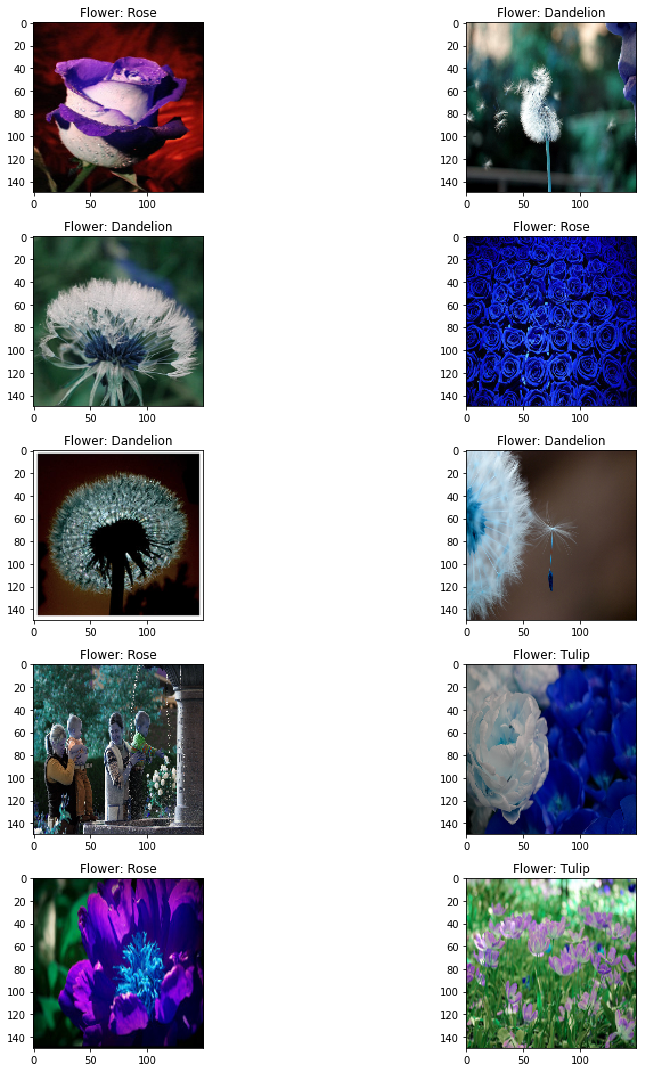

In [21]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rand.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [22]:
flower_path = "../input/flowers/flowers/"
flowers_dict = {}

for flower in os.listdir(flower_path):
    folder_path = os.path.join(flower_path, flower)
    flowers = os.listdir(folder_path)
    
    flowers_dict[flower] = [folder_path, flowers]
    img_idx = rand.randint(0,len(flowers)-1)
    flwr_img_path = os.path.join(flower_path, flower, flowers[img_idx])
    

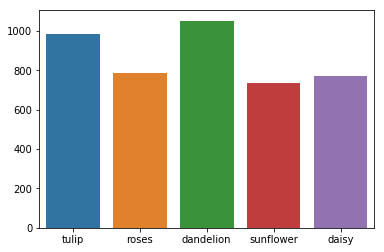

In [23]:
sns.barplot(x=['tulip','roses','dandelion','sunflower','daisy'] , y=[len(os.listdir(flower_path+'tulip')),
                                                                    len(os.listdir(flower_path+'rose')),
                                                                    len(os.listdir(flower_path+'dandelion')),
                                                                    len(os.listdir(flower_path+'sunflower')),
                                                                    len(os.listdir(flower_path+'daisy'))])

Row range for daisy images: (125, 442)
Column range for daisy images: (134, 640)
Most common row size:  239.0
Most common col size:  235.0


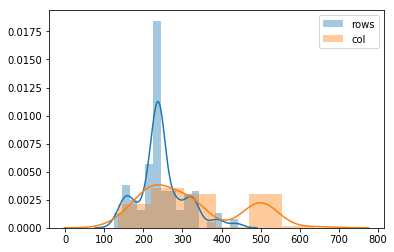

Row range for rose images: (80, 434)
Column range for rose images: (150, 500)
Most common row size:  236.0
Most common col size:  318.0


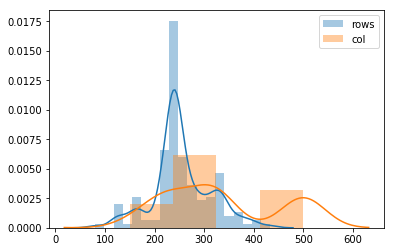

Row range for dandelion images: (98, 436)
Column range for dandelion images: (134, 500)
Most common row size:  240.0
Most common col size:  236.0


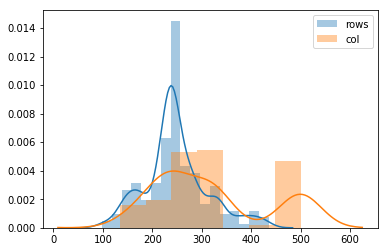

Row range for sunflower images: (134, 400)
Column range for sunflower images: (152, 640)
Most common row size:  235.0
Most common col size:  318.0


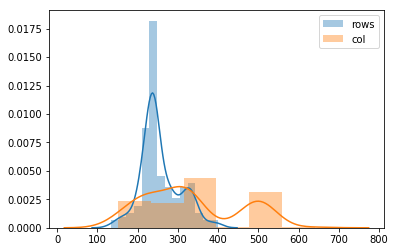

Row range for tulip images: (134, 441)
Column range for tulip images: (134, 1024)
Most common row size:  238.0
Most common col size:  490.0


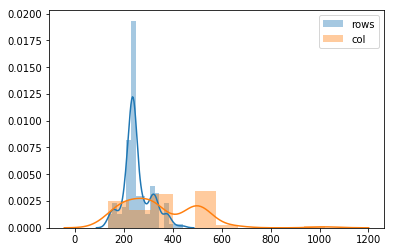

In [24]:
def get_unique_image_shapes(imgs, path):
    shape_set = set()
    for img in imgs:
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        if image is not None:
            shape_set.add(image.shape)
    return shape_set

def get_shape_ranges(shapes):
    shapes = list(shapes)
    
    min_row = min(shapes, key=lambda item: item[0])[0]
    max_row = max(shapes, key=lambda item: item[0])[0]
    
    row_range = (min_row, max_row)
    
    min_col = min(shapes, key=lambda item: item[1])[1]
    max_col = max(shapes, key=lambda item: item[1])[1]
    
    col_range = (min_col, max_col)

    return row_range, col_range

def plot_shape_hist(shapes):
    rows = [s[0] for s in shapes]
    cols = [s[1] for s in shapes]
    
    sns.distplot(rows, label='rows')
    sns.distplot(cols, label='col')
    
    rowhist, rowbins = np.histogram(rows, bins =50)
    colhist, colbins = np.histogram(cols, bins =50)
    print("Most common row size: ",round(rowbins[np.argmax(rowhist)]))
    print("Most common col size: ",round(colbins[np.argmax(colhist)]))
    plt.legend()
    
    plt.show()
    
for i in flowers_dict:
    path = flowers_dict[i][0]
    imgs = flowers_dict[i][1]
    shapes = get_unique_image_shapes(imgs, path)
    row_range, col_range = get_shape_ranges(shapes)
    print('Row range for {} images: {}'.format(i, row_range))
    print('Column range for {} images: {}'.format(i, col_range))
    
    plot_shape_hist(shapes)

In [25]:
IMG_ROW = 150
IMG_COL = 150
NUM_CLASSES = 5

In [26]:
parent_dir = "../input/flowers/flowers/"
def prepare_datadf(parent_dir):
    df = pd.DataFrame(columns = ['path', 'label'])
    
    for flower in os.listdir(parent_dir):
        folder_path = os.path.join(parent_dir, flower)
        flowers = os.listdir(folder_path)
        for i in flowers:
            df = df.append(pd.DataFrame({'path':[os.path.join(flower, i)], 'label':[flower]}), 
                           ignore_index=True)
    
    # Shuffling for randomness
    df = df.sample(frac=1.0).reset_index(drop=True)
    return df

In [27]:
# Create a dataframe with paths and labels
datadf = prepare_datadf(parent_dir)
train, test = train_test_split(datadf, test_size=0.053)
val, test = train_test_split(test, test_size=0.04)

In [28]:
# Creating training and validation generators with data augmentation in train generator
gen = ImageDataGenerator(rotation_range=10, # in degrees 0-180
                        zoom_range=0.1, # 10% zoom
                        width_shift_range = 0.1, # 10% of horizontal shift
                        height_shift_range = 0.1, # 10% vertical shift
                        horizontal_flip = True, # flip horizontally
                        shear_range = 0.1, # 10% shear
                        rescale = 1./255) # bring all pixel values between 0 and 1.

valgen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Creating train and validation generator instances to read image paths from dataframe 
train_generator=gen.flow_from_dataframe(dataframe=train, 
                                        directory=parent_dir, x_col="path", y_col="label", 
                                        class_mode="categorical", target_size=(IMG_ROW,IMG_COL), 
                                        batch_size=256)
val_generator = valgen.flow_from_dataframe(dataframe=val,
                                          directory=parent_dir,x_col="path", y_col="label", 
                                          class_mode="categorical", target_size=(IMG_ROW,IMG_COL), 
                                           batch_size=64)

Found 4093 validated image filenames belonging to 5 classes.
Found 220 validated image filenames belonging to 5 classes.


In [30]:
# Define training params
batch_size = 128
epochs = 10# Set to 1 for demo, for good results set 100, Running for 100 epochs will take time.
train_steps_per_epoch = train_generator.n//train_generator.batch_size
val_steps_per_epoch = val_generator.n//val_generator.batch_size

In [31]:
# Defining our custom cnn model
def cnn_model():
    model = Sequential()
    
    # First Conv layer
    model.add(Conv2D(filters=32,kernel_size=(5,5), padding='same', input_shape=(IMG_ROW, IMG_COL, 3)))
    model.add(LeakyReLU(alpha=0.02)) # Activation layer
    model.add(MaxPooling2D(pool_size=(2,2))) # Pooling layer
    
    # Second Conv layer
    model.add(Conv2D(filters=196, kernel_size=(5,5)))
    model.add(LeakyReLU(alpha=0.02))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Third Conv layer
    model.add(Conv2D(filters=256, kernel_size=(5,5)))
    model.add(LeakyReLU(alpha=0.02))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Forth Conv layer
    model.add(Conv2D(filters=512, kernel_size=(5,5)))
    model.add(LeakyReLU(alpha=0.02))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Flatten
    model.add(Flatten())
    
    # Fully connected layer 1
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.02))
    
    # Fully connected layer 2
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.02))
    
    # Output Layer
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [32]:
# Train the model
model = cnn_model()
history1=model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=val_steps_per_epoch,
                    epochs=epochs)

Epoch 1/10
15/15 [==============================] - 37s 2s/step - loss: 1.7075 - accuracy: 0.2301 - val_loss: 1.5365 - val_accuracy: 0.2812
Epoch 2/10
15/15 [==============================] - 34s 2s/step - loss: 1.3754 - accuracy: 0.3870 - val_loss: 1.4361 - val_accuracy: 0.5321
Epoch 3/10
15/15 [==============================] - 33s 2s/step - loss: 1.3333 - accuracy: 0.4139 - val_loss: 1.2757 - val_accuracy: 0.4808
Epoch 4/10
15/15 [==============================] - 33s 2s/step - loss: 1.2095 - accuracy: 0.4806 - val_loss: 1.1589 - val_accuracy: 0.5769
Epoch 5/10
15/15 [==============================] - 34s 2s/step - loss: 1.1672 - accuracy: 0.5012 - val_loss: 1.2228 - val_accuracy: 0.5365
Epoch 6/10
15/15 [==============================] - 33s 2s/step - loss: 1.1046 - accuracy: 0.5431 - val_loss: 1.1367 - val_accuracy: 0.5192
Epoch 7/10
15/15 [==============================] - 33s 2s/step - loss: 1.0635 - accuracy: 0.5661 - val_loss: 0.9354 - val_accuracy: 0.5833
Epoch 8/10
15/15 [==

In [33]:
# Inception Net
def inception():
    # Build a Sequential Model
    model = Sequential()
    
    # Add Inception module
    base_model = InceptionV3(include_top=False, input_shape=(IMG_ROW, IMG_COL, 3))
    
    ### Freezing initial layers
    for layer in base_model.layers[:249]:
        layer.trainable = False
    
    # Setting last layers as trainable | Unfreezing later layers
    for layer in base_model.layers[249:]:
        layer.trainable = True

    model.add(base_model)
    
    # Flatten *** Most Important *** Never forget to flatten a conv output before dense
    ## This is necessary for resolving dimension errors 
    model.add(Flatten()) 
    
    # Fully connected layer 1
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.02))
    model.add(Dropout(rate=0.1))
    
    # Fully connected layer 2
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.02))
    
    # Output Layer
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [34]:
# Train the model
incept_mod1 = inception()
history2=incept_mod1.fit_generator(generator=train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=val_steps_per_epoch,
                    epochs=epochs)

87916544/87910968 [==============================] - 4s 0us/step
Epoch 1/10
15/15 [==============================] - 42s 3s/step - loss: 3.1831 - accuracy: 0.4921 - val_loss: 39.2137 - val_accuracy: 0.2552
Epoch 2/10
15/15 [==============================] - 30s 2s/step - loss: 0.6106 - accuracy: 0.7959 - val_loss: 19.5247 - val_accuracy: 0.5064
Epoch 3/10
15/15 [==============================] - 32s 2s/step - loss: 0.4173 - accuracy: 0.8646 - val_loss: 12.7543 - val_accuracy: 0.5513
Epoch 4/10
15/15 [==============================] - 32s 2s/step - loss: 0.3097 - accuracy: 0.8891 - val_loss: 8.6127 - val_accuracy: 0.5513
Epoch 5/10
15/15 [==============================] - 32s 2s/step - loss: 0.2270 - accuracy: 0.9197 - val_loss: 4.9435 - val_accuracy: 0.5833
Epoch 6/10
15/15 [==============================] - 32s 2s/step - loss: 0.1705 - accuracy: 0.9406 - val_loss: 5.8933 - val_accuracy: 0.6218
Epoch 7/10
15/15 [==============================] - 32s 2s/step - loss: 0.1509 - accuracy: 0

In [35]:
# Resnet
def resnet():
    # Build a Sequential Model
    model = Sequential()
    
    # Add Inception module
    model.add(ResNet50(include_top=False, input_shape=(IMG_ROW, IMG_COL, 3)))
    
    # Flatten *** Most Important *** Never forget to flatten a conv output before dense
    ## This is necessary for resolving dimension errors 
    model.add(Flatten()) 
    
    # Fully connected layer
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.02))
    
    # Fully connected layer
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.02))
    
    # Output Layer
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    
    # Set trainable false to use pretrained weights and not update them
    model.layers[0].trainable = False
    
    # Compile the model
    model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [36]:
# Train the model
resmod1 = resnet()
history3=resmod1.fit_generator(generator=train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=val_steps_per_epoch,
                    epochs=epochs)

94658560/94653016 [==============================] - 4s 0us/step
Epoch 1/10
15/15 [==============================] - 39s 3s/step - loss: 18.3550 - accuracy: 0.4579 - val_loss: 4.2522 - val_accuracy: 0.2083
Epoch 2/10
15/15 [==============================] - 32s 2s/step - loss: 1.5245 - accuracy: 0.7866 - val_loss: 3.1988 - val_accuracy: 0.2500
Epoch 3/10
15/15 [==============================] - 33s 2s/step - loss: 0.6409 - accuracy: 0.8487 - val_loss: 3.1602 - val_accuracy: 0.1731
Epoch 4/10
15/15 [==============================] - 32s 2s/step - loss: 0.4056 - accuracy: 0.8834 - val_loss: 2.1722 - val_accuracy: 0.2628
Epoch 5/10
15/15 [==============================] - 33s 2s/step - loss: 0.2588 - accuracy: 0.9150 - val_loss: 2.3932 - val_accuracy: 0.2240
Epoch 6/10
15/15 [==============================] - 33s 2s/step - loss: 0.2170 - accuracy: 0.9255 - val_loss: 2.1423 - val_accuracy: 0.2692
Epoch 7/10
15/15 [==============================] - 33s 2s/step - loss: 0.1978 - accuracy: 0.9

In [37]:
def get_intermediate_activations(img):
    
    # Read image from path
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    plt.imshow(image)
    
    # Preprocess the image
    img_resized = cv2.resize(image, (299, 299))
    x = np.expand_dims(img_resized, axis=0)
    x = preprocess_input(x)
    
    # Load pretrained model
    base_model = InceptionV3(weights='imagenet')
    
    # Select layers for getting activations
    layer_outs = [layer.output for layer in base_model.layers[5:]]
    model = Model(inputs=base_model.input, outputs=layer_outs)
    
    # Make predictions
    act = model.predict(x)
    pred = base_model.predict(x)
    return act, pred


40960/35363 [==================================] - 0s 0us/step


[[('n11939491', 'daisy', 0.94566464),
  ('n02219486', 'ant', 0.0011440528),
  ('n03944341', 'pinwheel', 0.0009121015),
  ('n02190166', 'fly', 0.0007776261),
  ('n02206856', 'bee', 0.0004615471)]]

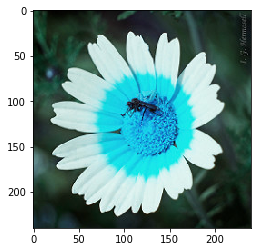

In [38]:
img = '../input/flowers/flowers/daisy/4511693548_20f9bd2b9c_m.jpg'
act,pred  = get_intermediate_activations(img)
decode_predictions(pred)

In [40]:
training_set = gen.flow_from_directory('../input/flowers/flowers/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 4323 images belonging to 5 classes.


In [41]:
#make predictions for new image

import numpy as np
from keras.preprocessing import image

test_image = image.load_img('../input/flowers/flowers/daisy/4511693548_20f9bd2b9c_m.jpg', target_size = (150, 150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [42]:
if result[0][0] == 1:
    prediction = 'Daisy'
elif result[0][1]==1:
    prediction = 'Dandelion'
elif result[0][2]==1:
    prediction = 'Rose'
elif result[0][3]==1:
    prediction='Sunflower'
elif result[0][4]==1:
    prediction='Tulip'
print('so the flower is %s' %prediction)

so the flower is Daisy


In [43]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    cnn_imgs = []
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            cnn_imgs.append(activation[0, :, :, activation_index:activation_index+3])
            ax[row][col].imshow(((activation[0, :, :, activation_index:activation_index+3])*255).
                                astype(np.uint8))
            activation_index += 1
    return cnn_imgs

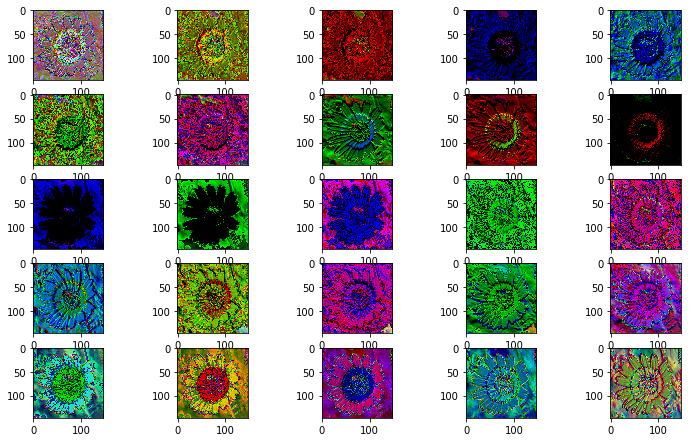

In [44]:
k =display_activation(act,5,5,1)    

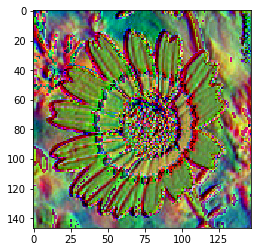

In [45]:
plt.imshow((k[24]*255).astype(np.uint8))

In [46]:
print(history1.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


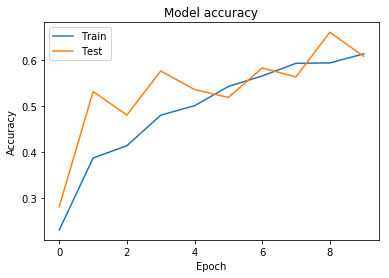

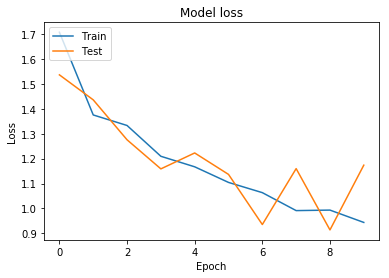

In [48]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

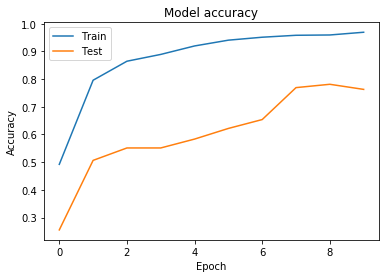

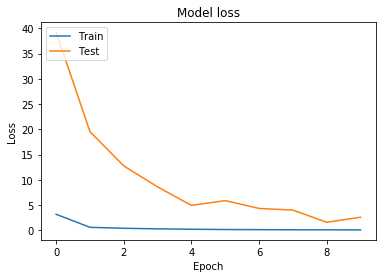

In [49]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

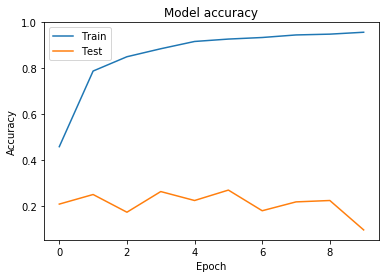

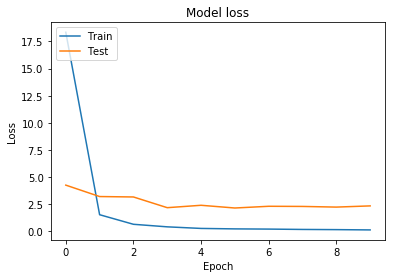

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [61]:
pip install plotly==4.5.0

     |████████████████████████████████| 7.1MB 8.9MB/s eta 0:00:01     |███████████████████████████████▍| 7.0MB 8.9MB/s eta 0:00:01
  Found existing installation: plotly 4.4.0
    Uninstalling plotly-4.4.0:
      Successfully uninstalled plotly-4.4.0
Note: you may need to restart the kernel to use updated packages.


In [67]:
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 

import seaborn as sns
import cv2


In [68]:
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go
x_ = np.array(range(len(history1.history['val_loss']))) # get loss values from the history
trace1 = go.Scatter(
        x = x_,
        y = history1.history['val_loss'], # get loss values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,255,0,0.9)"),
        text = "Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history1.history['val_accuracy'],# get accuracy values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,0,255,0.9)"),
        text = "Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Training Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

AttributeError: module 'plotly.validators.scatter' has no attribute 'TexttemplateValidator'

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 196)       156996    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 71, 71, 196)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 196)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 256)      

In [71]:
incept_mod1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              18875392  
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)              

In [72]:
resmod1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              52429824  
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                

In [74]:
import anvil.server

anvil.server.connect("BWUGZUCX7OAIBEC54BMUF2SI-QF4U3JEWSU54FK5B")

In [75]:
import anvil.media
from PIL import *
import PIL.Image
from PIL import Image
import numpy

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as img:
       # img= Image.open("../input/flowers/flowers/daisy/4511693548_20f9bd2b9c_m.jpg")
       # np_img = numpy.array(img)
       # print (np_img.shape)
       # img=image.load_img(filename)
        img= Image.open("../input/flowers/flowers/daisy/4511693548_20f9bd2b9c_m.jpg")
        np_img = numpy.array(img)
        print (np_img.shape)
        #scaler = 'BICUBIC'
        #resample = {
              #  'ANTIALIAS': Image.ANTIALIAS,
              #  'BILINEAR': Image.BILINEAR,
               # 'BICUBIC': Image.BICUBIC
               #         }
        np_img=np_img.resize((150,150),"Image.BICUBIC")
        np_img=np.expand_dims(arr,axis=0)
        np_img /=255.0
    score = model.predict(np_img)
    training_set.class_indices

    if result[0][0] == 1:
      prediction = 'Daisy'
    elif result[0][1]==1:
      prediction = 'Dandelion'
    elif result[0][2]==1:
      prediction = 'Rose'
    elif result[0][3]==1:
     prediction='Sunflower'
    elif result[0][4]==1:
     prediction='Tulip'
    return(float(score))


In [ ]:
#save the trained model
model.save('h1.h5')
#In order to load the saved model we can use "load_weights" parameter
model.load_weights('h1.h5')